In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

from cleaning_script import NOMINAL, CONTINUOUS, ORDINAL, DISCRETE

### Read in Data

In [2]:
# import data
house_train = pd.read_csv('../datasets/train.csv')

# increase column width
pd.set_option('display.max_columns', 100)

# Fix Column names

In [3]:
house_train.columns = [x.replace(' ', '_').lower() for x in house_train.columns]
house_train.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Continuous Variables

In [4]:

# check data 
house_train[CONTINUOUS].isnull().sum() # lot_frontage missing a lot of data

# check numeric data
house_train[CONTINUOUS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_frontage    1721 non-null   float64
 1   lot_area        2051 non-null   int64  
 2   mas_vnr_area    2029 non-null   float64
 3   bsmtfin_sf_1    2050 non-null   float64
 4   bsmtfin_sf_2    2050 non-null   float64
 5   bsmt_unf_sf     2050 non-null   float64
 6   total_bsmt_sf   2050 non-null   float64
 7   1st_flr_sf      2051 non-null   int64  
 8   2nd_flr_sf      2051 non-null   int64  
 9   gr_liv_area     2051 non-null   int64  
 10  garage_area     2050 non-null   float64
 11  wood_deck_sf    2051 non-null   int64  
 12  open_porch_sf   2051 non-null   int64  
 13  enclosed_porch  2051 non-null   int64  
 14  3ssn_porch      2051 non-null   int64  
 15  screen_porch    2051 non-null   int64  
 16  pool_area       2051 non-null   int64  
 17  misc_val        2051 non-null   i

# Discrete Variables


In [17]:
# check for missing data
house_train[DISCRETE].isnull().sum() # garage_yr_built missing a lot of data


year_built          0
year_remod/add      0
bsmt_full_bath      2
bsmt_half_bath      2
full_bath           0
half_bath           0
bedroom_abvgr       0
kitchen_abvgr       0
totrms_abvgrd       0
fireplaces          0
garage_yr_blt     114
garage_cars         1
mo_sold             0
yr_sold             0
dtype: int64

# Ordinal Variables 

In [6]:
# check data
house_train[ORDINAL].isnull().sum() # fireplace_qu, pool_qc, fence missing a lot

lot_shape            0
utilities            0
land_slope           0
house_style          0
overall_qual         0
overall_cond         0
exter_qual           0
exter_cond           0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
heating_qc           0
electrical           0
kitchen_qual         0
functional           0
fireplace_qu      1000
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
pool_qc           2042
fence             1651
dtype: int64

# Nominal Variables

In [7]:
# check data
house_train[NOMINAL].isnull().sum() # alley, misc_feature missing a lot 

ms_subclass        0
ms_zoning          0
street             0
alley           1911
land_contour       0
lot_config         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type      22
foundation         0
heating            0
central_air        0
garage_type      113
misc_feature    1986
sale_type          0
sale_type          0
dtype: int64

# Examine Columns that are missing a lot of data

In [14]:
# missing more than 20 % of their data
big_losers = {}
# missing anything
missing = {}
# not missing anything
full = []

# iterate through the columns, find any columns with missing data, append to appropriate dict or list
for idx, item in house_train.isnull().sum().items():
    missing_amount = round(item/len(house_train),4)
    if missing_amount > .20:
        big_losers.update({idx:missing_amount})
    elif item > 1:
        missing.update({idx:missing_amount})
    else:
        full.append(idx)

Columns Missing A lot 

In [15]:
big_losers # all of these categories are things a house might just not have, like a fence or a pool or a fireplace

{'alley': 0.9317,
 'fireplace_qu': 0.4876,
 'pool_qc': 0.9956,
 'fence': 0.805,
 'misc_feature': 0.9683}

Columns Missing Some

In [16]:
missing # lot frontage is missing 16% of its data but the rest are pretty O.K. 

{'lot_frontage': 0.1609,
 'mas_vnr_type': 0.0107,
 'mas_vnr_area': 0.0107,
 'bsmt_qual': 0.0268,
 'bsmt_cond': 0.0268,
 'bsmt_exposure': 0.0283,
 'bsmtfin_type_1': 0.0268,
 'bsmtfin_type_2': 0.0273,
 'bsmt_full_bath': 0.001,
 'bsmt_half_bath': 0.001,
 'garage_type': 0.0551,
 'garage_yr_blt': 0.0556,
 'garage_finish': 0.0556,
 'garage_qual': 0.0556,
 'garage_cond': 0.0556}

In [11]:
house_train['meltdown'] = [1 if sale_year > 2006 else 0 for sale_year in house_train['Yr Sold']]

KeyError: 'Yr Sold'

In [ ]:
# property size, location, desirability, nearby amenities, number of rooms, construction materials, age/condition of structure.
# house_train.columns = ['_'.join(re.findall('[A-Z][a-z]*', x)) for x in house_train.columns]

# wine.columns = [x.replace(' ', '_').lower() for x in wine.columns]
# house_train.columns = [col.lower() for col in house_train.columns]

# msno.matrix(house_train[['Lot Shape', 'Utilities', 'Lot Config']])

# Age

In [ ]:
house_train['age'] = house_train['Yr Sold'] - house_train['Year Built']

# Neighborhood Group

In [ ]:
test = house_train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)

neighbor_hood_dict = {}
for i, val in enumerate(test):
    neighbor_hood_dict.update({test.index[i]:i})

house_train['neighborhood_price_rank'] = [neighbor_hood_dict[neighborhood] for neighborhood in house_train.Neighborhood]

In [ ]:
# house_train = house_train[~cleaning_script.is_outlier(house_train['Gr Liv Area'])]
# house_train = house_train[~cleaning_script.is_outlier(house_train['SalePrice'])]

In [ ]:
house_train.shape

(2051, 84)

# Quick Model

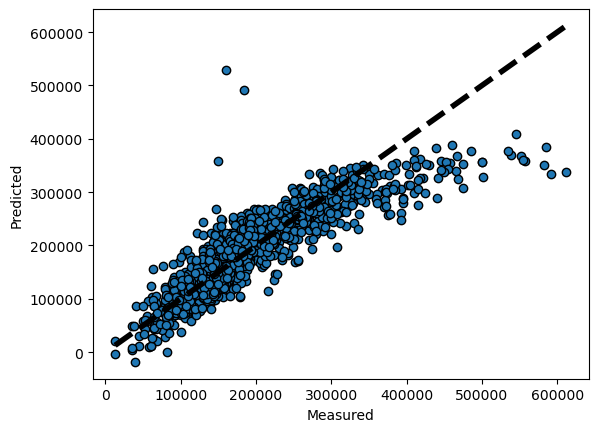

Accuracy: 0.78 ± 0.07


In [ ]:
X = house_train[['neighborhood_price_rank', 'Gr Liv Area', 'Overall Qual', 'age', 'Full Bath', 'meltdown']]
y = house_train.SalePrice
# scores are r^2
scores_1 = (cross_val_score(LinearRegression(), X, y, cv = KFold(n_splits=5,
                                                                 shuffle=True,
                                                                 random_state=73)))

y_pred = (cross_val_predict(LinearRegression(), X, y,cv = KFold(n_splits=5,
                                                                 shuffle=True,
                                                                 random_state=73)))


fig, ax = plt.subplots()
ax.scatter(house_train.SalePrice, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()
print("Accuracy: %0.2f ± %0.2f" % (scores_1.mean(), scores_1.std() * 2))

In [ ]:
house_train['Yr Sold'].unique()

array([2010, 2009, 2006, 2007, 2008], dtype=int64)